# 泰坦尼克号存活率分析


# 数据相关


## 来源
数据来源于著名的数据分析竞赛网站Kaggle


## 规模
包括泰坦尼克号上 2224 名乘客和船员中 891 名的人口学数据和乘客基本信息。


## 数据字典

Survived：存活情况。1-存活，0-死亡。

Pclass：舱位等级。1-上层，2-中间层，3-底层。

Name：姓名

Sex：性别

Age：年龄

SibSp：同乘的兄弟姐妹/配偶数

Parch：同乘的父母/小孩数

Ticket：船票编号

Fare：船票价格

Cabin：客舱号

Embarked：登船港口。C：Cherbourg（瑟堡），Q：Queenstown（皇后镇），S：Southampton（南安普顿）。

# 提出问题

1. 探索舱室等级对存活率的影响
2. 探索性别对存活率的影响
3. 探索年龄对存活率的影响
4. 探索乘客间是兄弟姐妹/配偶关系的对存活率的影响
5. 探索乘客间是父母/小孩关系的对存活率的影响
7. 探索舱室等级与年龄的综合因素对存活率的影响

# 数据再加工

In [1]:
# 1. 数据采集

# 导入数据处理python库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 导入原始数据
titanic = pd.read_csv("./titanic-data.csv")

# 预览样本数据
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [2]:
# 2 数据清理

# 去重前行数
print len(titanic)

# 去重，去除完全一致的行
titanic = titanic.drop_duplicates('Name')

# 去重后行数
print len(titanic)

# 填充缺失值
values = {'Age': 0, 'Cabin':"无"}
titanic = titanic.fillna(value=values) 

# 查看清理结果
titanic.head(10)

891
891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,无,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,无,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,无,S
5,6,0,3,"Moran, Mr. James",male,0.0,0,0,330877,8.4583,无,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,无,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,无,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,无,C


# 数据探索

In [3]:
# 定义常量# 定义常量
SURVIVED = 'Survived'
DENSITY = 'Density'
GRAPH_TYPE_BAR = 'bar'
GRAPH_TYPE_PIE = 'pie'
HEADER_SURVIVED = 'survived'
HEADER_TOTAL = 'total'
HEADER_RATE = 'rate'

In [4]:
def print_result(title, grouped_survied_factors, grouped_each_factor_counts, survived_rate):
    """
    数据集横向合并后输出
    title：feature title
    grouped_survied_factors：存活数
    grouped_each_factor_counts：总数
    survived_rate：成活率
    """
    print('Profile feature \"'+ title + '\" survival rate')
    print('-------------------------------------------')
    # 横向拼接并输
    result = pd.concat([grouped_survied_factors, grouped_each_factor_counts, survived_rate], axis = 1)
    result.columns = [HEADER_SURVIVED, HEADER_TOTAL, HEADER_RATE]
    print(result)

def analyse_with_one_factor(title, x_axis, y_axis, survived, factor):
    """
    基于单个特征因素分析
    title：标题
    x_axis：x轴
    y_axis：y轴
    survived：存活人数
    factor：特征
    """
    # 分组
    df_grouped = titanic[[survived, factor]].groupby(factor)
    
    # 统计每组生存者的总数
    grouped_survied_factors = df_grouped.sum()
    
    # 统计分组总有人数
    grouped_each_factor_counts = df_grouped.count()
    
    # 计算存活率
    survived_rate = grouped_survied_factors / grouped_each_factor_counts
    
    # 横向拼接并输出
    print_result(factor, grouped_survied_factors, grouped_each_factor_counts, survived_rate)
    
    # 绘制直方图
    survived_rate.plot(kind = GRAPH_TYPE_BAR)
    
    plt.title(title)
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    
    plt.show()

def analyse_with_double_factor(title, x_axis, y_axis, survived, factor1, factor2, ):
    """
    基于双重因素的预测
    title：标题
    x_axis：x轴
    y_axis：y轴
    survived：存活人数
    factor1：特征1
    factor2：特征2
    """
    series_grouped_factor = titanic.groupby([factor1, factor2])[survived]
    
    grouped_survied_factors = series_grouped_factor.sum()
    grouped_each_factor_counts = series_grouped_factor.count()

    survived_rate = grouped_survied_factors / grouped_each_factor_counts

    # 横向拼接并输出
    print_result(factor1 + ' + ' + factor2, grouped_survied_factors, grouped_each_factor_counts, survived_rate)
    
    # 绘制直方图
    survived_rate.unstack().plot(kind = GRAPH_TYPE_BAR)
    
    plt.title(title)
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    
    plt.show()

# 预测

## 1. 探索舱室等级对存活率的影响

Profile feature "Pclass" survival rate
-------------------------------------------
        survived  total      rate
Pclass                           
1            136    216  0.629630
2             87    184  0.472826
3            119    491  0.242363


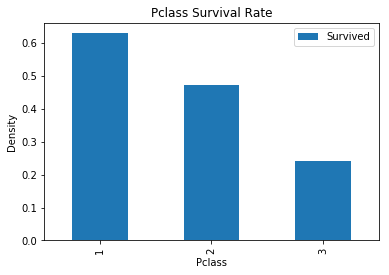

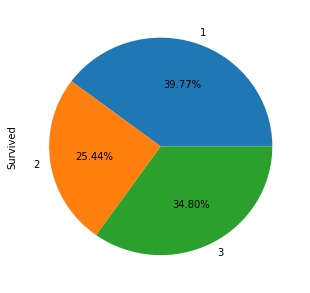

In [9]:
analyse_with_one_factor( 'Pclass Survival Rate', "Pclass", DENSITY, SURVIVED, 'Pclass', )

titanic.groupby('Pclass')['Survived'].sum().plot.pie(figsize=(5,5), autopct='%.2f%%')

### 图形解读：x轴为舱位等级，y轴为存活率

数据解读：一级舱存活人数占总存活人数的百分比：39.77%，一级舱存活人数占总存活人数的百分比：25.44%，一级舱存活人数占总存活人数的百分比：34.80%

## 2. 探索性别对存活率的影响

Profile feature "Sex" survival rate
-------------------------------------------
        survived  total      rate
Sex                              
female       233    314  0.742038
male         109    577  0.188908


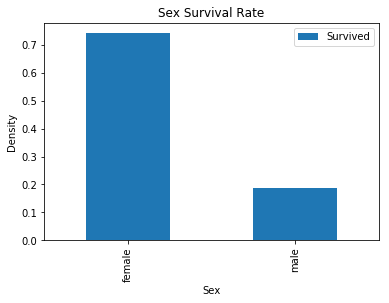

In [6]:
analyse_with_one_factor('Sex Survival Rate', 'Sex', DENSITY, SURVIVED, 'Sex')

图形解读：x轴为性别 female（女士）、male（男士），y轴为存活率系数 

数据解读：女士存活率：74.20%，男士存活率：18.89%

## 3. 探索乘客间是父母/小孩关系的对存活率的影响

Profile feature "Parch" survival rate
-------------------------------------------
       survived  total      rate
Parch                           
0           233    678  0.343658
1            65    118  0.550847
2            40     80  0.500000
3             3      5  0.600000
4             0      4  0.000000
5             1      5  0.200000
6             0      1  0.000000


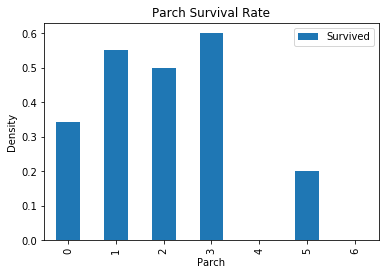

In [7]:
analyse_with_one_factor('Parch Survival Rate', 'Parch', DENSITY,SURVIVED, 'Parch')

图形解读：x轴代表乘客中父母携带小孩的数量，y轴代表存活率系数

数据解读：小孩数量0个的存活率：34.36%，1个的存活率：55.08%，2个的存活率：50.00%，3个的存活率：60%，4个存活率：0%，5个的存活率：20%，6个的存活率：0%

## 4. 探索舱室等级与性别的综合因素对存活率的影响

Profile feature "Pclass + Sex" survival rate
-------------------------------------------
               survived  total      rate
Pclass Sex                              
1      female        91     94  0.968085
       male          45    122  0.368852
2      female        70     76  0.921053
       male          17    108  0.157407
3      female        72    144  0.500000
       male          47    347  0.135447


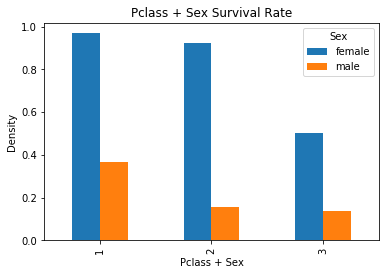

In [8]:
analyse_with_double_factor( 'Pclass + Sex Survival Rate', 'Pclass + Sex', DENSITY,SURVIVED, 'Pclass', 'Sex')

图形解读：x轴代表不同等级的舱室中男女存活数据，y轴代表存活率系数

数据解读：1级舱室中男女存活率分别为：36.8%、96.80%，2级舱室中男女存活率分别为：15.74%、92.10%，3级舱室中男女存活率分别为：13.54%、50.00%

# 结论

1. 舱位等级越高，存活率越高
2. 女性存活率高于男性
3. 有0-3个孩子的家庭，人员存活率高
4. 舱室等级越高且性别为女性的乘客，存活率越高

泰坦尼克号上有2224名乘客和船员，乘客1300多人，船员800多人，本数据集去重后，仍然有891条数据有效，占了总乘客数的近60%。数据如果是随机抽取的，本次分析就具有代表性，如果是因为数据流失导致没有收集到数据，那么结果可能是有偏差的。另外，800多船员的数据并不在内，船员的求生技能相较于乘客来说会高一些，这样会影响数据分析的结论。